# ***PROJECT ON UNSUPERVISED LEARNING - GLASS DATASET***

This project focuses on applying unsupervised machine learning techniques to the Glass Identification Dataset. The dataset contains chemical attributes of different glass samples, and the objective is to explore the underlying structure and natural groupings in the data without using the target labels.
Several unsupervised models have been used in this analysis:
K-Means Clustering – to partition the dataset into k distinct groups based on feature similarity.
DBSCAN (Density-Based Spatial Clustering) – to identify clusters of varying shapes and detect noise points.
Agglomerative Clustering – a hierarchical approach to uncover nested cluster structures.
PCA (Principal Component Analysis) – for reducing dimensionality and visualizing the data in 2D.
LDA (Linear Discriminant Analysis) – although supervised, used here for dimensionality reduction and comparison due to its class-separation capabilities.
The goal of this project is to understand how different clustering algorithms perform on the dataset, visualize the groupings, and evaluate their effectiveness using metrics and visual tools.


In [ ]:
#   Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv("/content/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

The dataset contains 214 rows and 10 columns.

Features: RI, Na, Mg, Al, Si, K, Ca, Ba, Fe

Target: Type

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



Features: RI, Na, Mg, Al, Si, K, Ca, Ba, Fe (used for clustering)

Target: Type (not used in unsupervised clustering)




In [ ]:
x = df.drop(columns=['Type'])

In [ ]:
y=df['Type']       # (not used in unsupervised clustering)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# ***K MEANS***

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[1926.0000000000005,
 1558.9708980171706,
 1239.415653091389,
 1057.4141960770828,
 932.9092391022175,
 792.6705405545878,
 712.5227395809596,
 669.6049194741375,
 584.9796357764394,
 533.1651174599501]

plot elbow curve

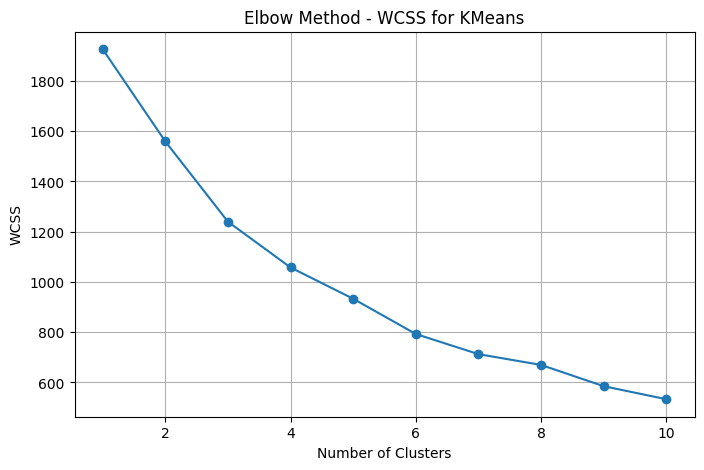

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - WCSS for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

Apply KMeans with K=4 (based on elbow)


In [ ]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_final.fit_predict(x_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1,
       2, 2, 2, 2, 3, 3, 3, 1, 3, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
x['Clusters'] =clusters
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Clusters
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,2
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,2
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,2
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,2
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,3
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,3
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,3
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,3


# ***PCA***



Reduce the data and centroids to 2D using --- > PCA.




In [ ]:
# PCA for 2D visualization

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [ ]:
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

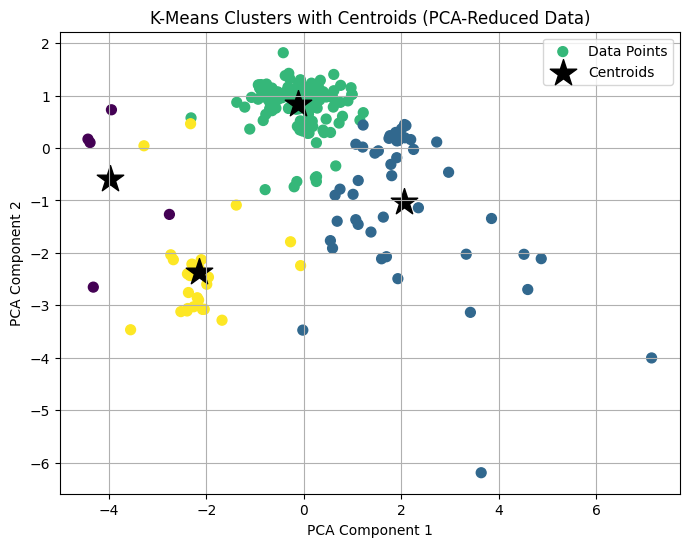

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', s=50, label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],c='k',s=400, marker='*', label='Centroids')
plt.title("K-Means Clusters with Centroids (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# ***Agglomarative clustering***

plot dendrograms

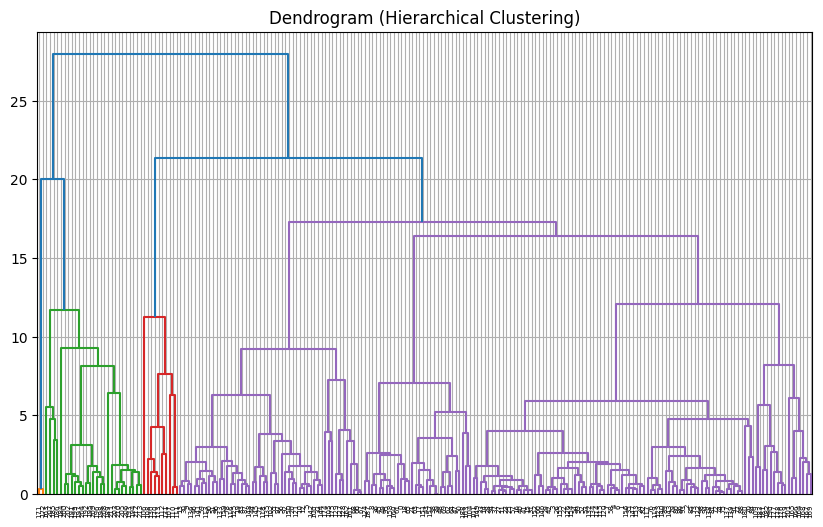

In [ ]:
plt.figure(figsize=(10, 6))
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.grid(True)
plt.show()

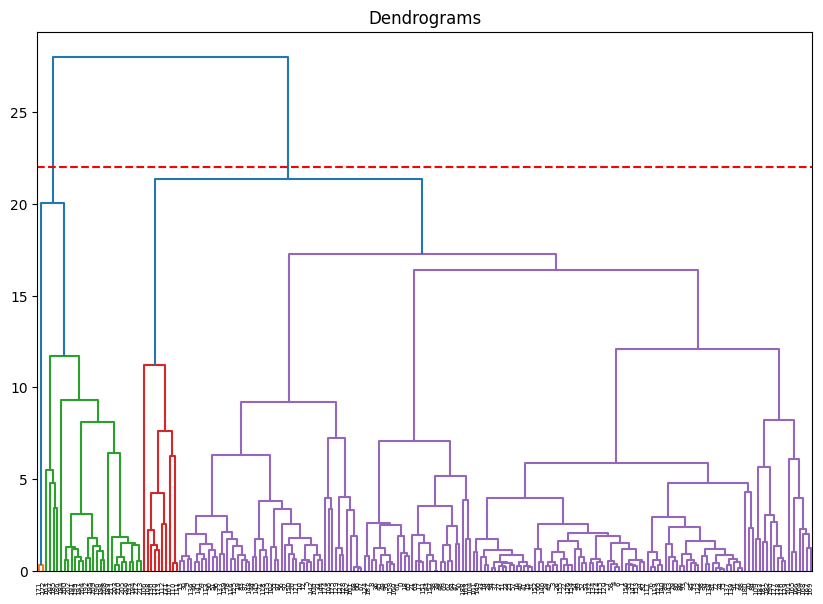

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))
plt.axhline(y=22, color='r', linestyle='--')

In [ ]:
agg = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

In [ ]:
clusters=agg.fit_predict(x_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

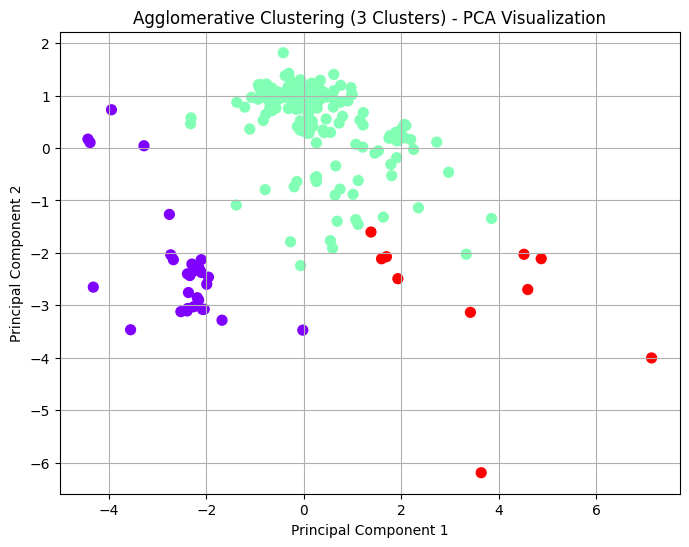

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title("Agglomerative Clustering (3 Clusters) - PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# ***DBSCAN CLUSTERING***

In [ ]:
dbscan = DBSCAN(eps=0.8,min_samples=5)

In [ ]:
clusters = dbscan.fit_predict(x_scaled)

In [ ]:
df['Clusters'] = clusters
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Clusters
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,-1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,-1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,-1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,-1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,-1


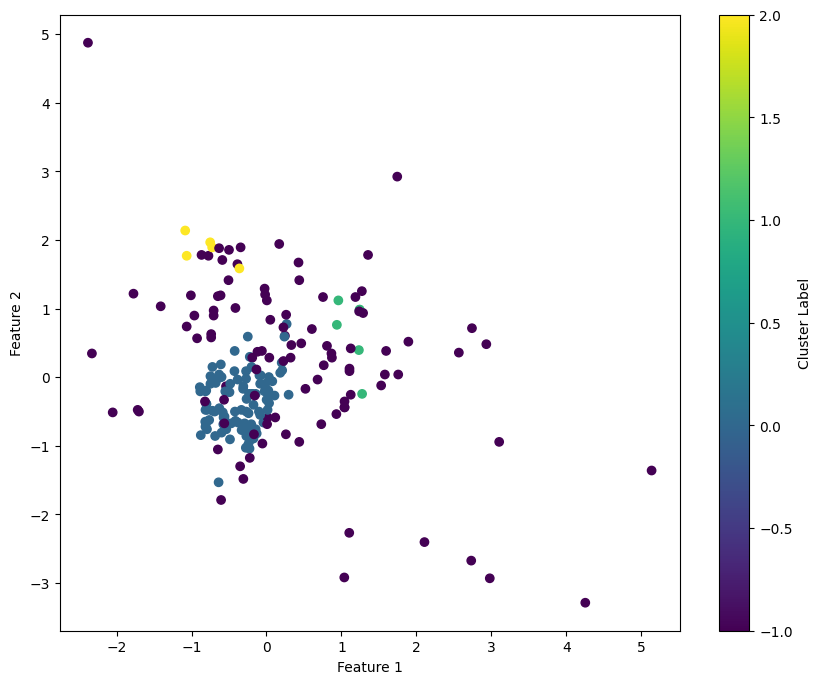

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_scaled[:,0],x_scaled[:,1],c = clusters,cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label = "Cluster Label")
plt.show()

In [ ]:
print(df['Clusters'].value_counts())

Clusters
 0    102
-1    101
 1      6
 2      5
Name: count, dtype: int64


In [ ]:
df.to_csv("Clustered_glass_identification.csv",index=False)

# ***LDA- Linear Discriminant Analysis***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

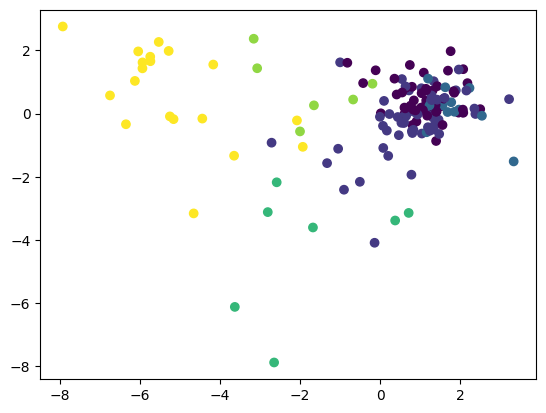

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis')

In [ ]:
cls = RandomForestClassifier(max_depth=2,random_state=42)
cls.fit(x_train,y_train)
y_pred =cls.predict(x_test)

61.53846153846154
[[12  7  0  0  0  0]
 [ 7 16  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 0  3  0  3  0  0]
 [ 2  0  0  0  0  1]
 [ 0  1  0  0  0  9]]


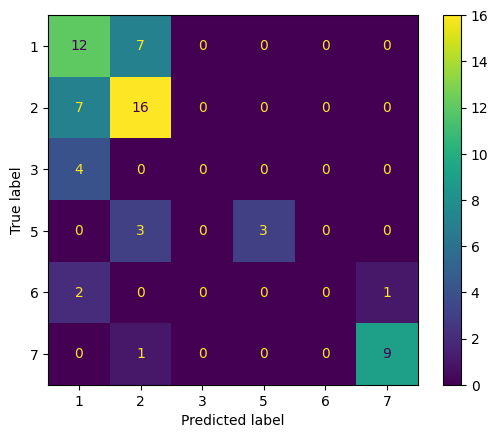

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## ***Conclusion***


In this project, various unsupervised learning models were applied to the Glass Identification dataset to explore natural groupings and patterns within the data. Models like KMeans, DBSCAN, Agglomerative Clustering, PCA, and LDA were used to analyze and visualize the structure of the dataset without using the target labels.

Through techniques like the Elbow Method, dendrograms, and PCA visualizations, we were able to identify meaningful clusters and compare how each algorithm groups the data based on chemical features. Each method provided unique insights—KMeans showed clear centroids, DBSCAN revealed outliers, and Agglomerative Clustering highlighted hierarchical relationships.

Overall, unsupervised learning proved to be a powerful approach to understand the hidden structure in the glass data, especially useful when labels are unknown or limited.